In [1]:
import matplotlib.pyplot as plot
import numpy as np

In [ ]:
# rawData = np.loadtxt("VShock.dat", skiprows=2)
# time, R_s, V_s = rawData.T

In [ ]:
# plot.clf()
# plot.plot(time*3.17098*10**-8, V_s*10**-5, label=r"$V_{shock}$")

# plot.xscale("log")
# plot.yscale("log")
# plot.grid()
# plot.legend()
# plot.show()

In [ ]:
# plot.clf()
# plot.plot(time*3.17098*10**-8, R_s*10**-5, label=r"$R_{shock}$")

# plot.xscale("log")
# plot.yscale("log")
# plot.grid()
# plot.legend()
# plot.show()

In [ ]:
totalData = [[],[]]
for i in range(1,16):
    if i != 2:
        filename = "Oper_c"+str(i)+"-0_Phi.dat" 
        rawData = np.loadtxt(filename, skiprows=2)
        mdm, vdm, scatter = rawData.T
        totalData[0].append(vdm)
        totalData[1].append(scatter)

In [ ]:
plot.clf()
dmMass = mdm[0]
for i in range(len(totalData[0])):
    num = i+1
    if i >= 2:
        num = i+2
    couplingLabel = r"$c_{"+str(num)+"}^{0}$"
    lineStyle = "solid"
    if num >= 11:
        lineStyle = "dotted"
    if num == 1:
    # if num==7 or num==13 or num==14:
        plot.plot(totalData[0][i], totalData[1][i], label=couplingLabel, linestyle=lineStyle)

plot.title(r"$m_\chi$ "+str(dmMass)+r" GeV, $c_{i}^{0} = 3.593 \times 10^{-1}$ GeV$^{-2}$")# \approx 3 \times 10^{30}$ cm$^{2}$")
plot.xlabel(r"Dark Matter Velocity [km s$^{-1}$]")
plot.ylabel(r"Scattered Dark Matter[(cm s$^{-1}$)$^{-1}$ s$^{-1}$ cm$^{-2}$]")
# plot.xscale("log")
# plot.yscale("log")
plot.ylim(10**-16, 3*10**-15)
plot.xlim(4300, 4520)
plot.grid()
plot.legend()
plot.show()

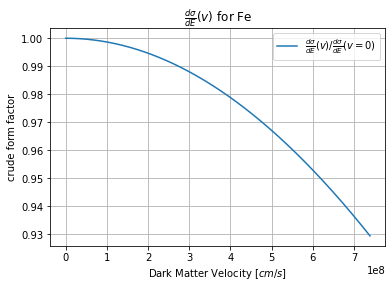

In [16]:
DsigmaDe, vel = np.loadtxt("temp.dat", skiprows=6).T

elements = ["H", "He", "C", "O", "Ne", "Mg", "Si", "S", "Fe"]
element = elements[8]

plot.clf()

plot.plot(vel, DsigmaDe/DsigmaDe[0], label=r"$\frac{d\sigma}{dE}\left(v\right) / \frac{d\sigma}{dE}\left(v=0\right)$")

plot.title(r"$\frac{d\sigma}{dE}\left(v\right)$ for "+element)# \approx 3 \times 10^{30}$ cm$^{2}$")
plot.xlabel(r"Dark Matter Velocity [$cm/s$]")
plot.ylabel("crude form factor")#r"$\frac{d\sigma}{dE}\left(v\right)$ [cm $^{2}$ GeV $^{-1}$]")
# plot.xscale("log")
# plot.yscale("log")
# plot.ylim(10**-16, 3*10**-15)
# plot.xlim(0, 10**8)
plot.grid()
plot.legend()
# plot.show()
plot.savefig("FF_"+element+".pdf")

In [45]:
A_cat = 0.281695
B_cat = 7.44089
C_cat = -6.37784
D_cat = 1

y0_cat = A_cat*B_cat**2
y1_cat = A_cat*2*B_cat*C_cat
y2_cat = A_cat*(C_cat**2 + 2*B_cat*D_cat)
y3_cat = A_cat*2*C_cat*D_cat
y4_cat = A_cat*D_cat**2

print(y0_cat, y1_cat, y2_cat, y3_cat, y4_cat)

c1 = 0.3599
print(c1**2)

yconv = 21.813

array0_cat = c1**2*y0_cat*(yconv)**0
array1_cat = c1**2*y0_cat*(yconv)**1
array2_cat = c1**2*y0_cat*(yconv)**2
array3_cat = c1**2*y0_cat*(yconv)**3
array4_cat = c1**2*y0_cat*(yconv)**4

print(array0_cat, array1_cat, array2_cat, array3_cat, array4_cat)

vel = 3.3356*10**-6
print(vel**2)

# print(c1**2*y0_cat/2.02, c1**2*y1_cat/-75.54, c1**2*y2_cat/964.5, c1**2*y3_cat/-4830.31, c1**2*y4_cat/8260.19)

mdm = 1

result_cat = (array0_cat + array1_cat*(mdm*vel)**2 + array2_cat*(mdm*vel)**4 + array3_cat*(mdm*vel)**6 + array4_cat*(mdm*vel)**8) * np.exp(-2*yconv*(mdm*vel)**2)
print(result_cat)


15.596563118354606 -26.73668986338106 15.65058632446419 -3.5932112775999996 0.281695
0.12952801
2.0201917835598664 44.06644337479136 961.2213293343239 20967.120856769605 457355.8072487154
1.112622736e-11
2.020191783069573
